In [9]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [10]:
# Define a list of stock symbols
stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA"]


In [11]:
# Define a date range for historical data
start_date = "2023-01-01"
end_date = "2023-10-12"

In [12]:
# Download historical stock price data using yfinance
stock_data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [13]:
# Calculate daily returns
returns = stock_data.pct_change().dropna()

# Calculate the mean and covariance matrix of returns
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Set the number of portfolio simulations
num_portfolios = 10000

# Initialize arrays to store portfolio results
results = np.zeros((4, num_portfolios))


In [14]:
for i in range(num_portfolios):
    # Generate random portfolio weights
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    
    # Calculate portfolio returns and volatility
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    # Store portfolio results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_stddev
    results[2,i] = portfolio_return / portfolio_stddev
    results[3,i] = np.sqrt(252) * np.dot(weights, mean_returns)

In [15]:
# Create a DataFrame to store portfolio results
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio', 'CAPM Alpha'])

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]

# Find the portfolio with the maximum CAPM Alpha
max_alpha_portfolio = results_df.iloc[results_df['CAPM Alpha'].idxmax()]

Data Visualizations

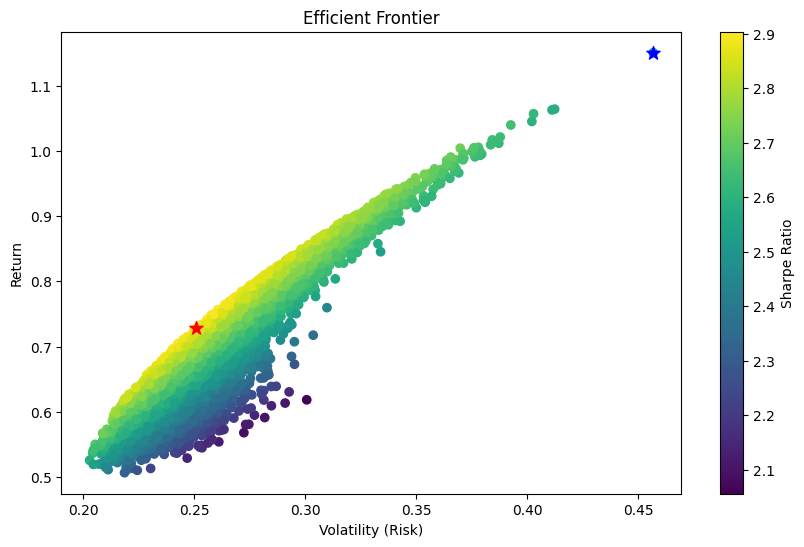

In [16]:
# Visualize the efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio[1], max_sharpe_portfolio[0], c='red', marker='*', s=100)
plt.scatter(max_alpha_portfolio[1], max_alpha_portfolio[0], c='blue', marker='*', s=100)
plt.show()

In [17]:
# Print portfolio with maximum Sharpe ratio
print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

Portfolio with Maximum Sharpe Ratio:
Return          0.728314
Volatility      0.250844
Sharpe Ratio    2.903453
CAPM Alpha      0.045879
Name: 4598, dtype: float64


In [18]:

print("\nPortfolio with Maximum CAPM Alpha:")
print(max_alpha_portfolio)


Portfolio with Maximum CAPM Alpha:
Return          1.150839
Volatility      0.456709
Sharpe Ratio    2.519853
CAPM Alpha      0.072496
Name: 298, dtype: float64


Sharpe Ratio Grading Thresholds:
2 – 2.99: Very good end sharpe ratio = 2.51 is very good for investements 